In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# calculate covariance matrix of input matrix X with shape (D, N) that has D dimension and N samples
def calculate_covariance_matrix(X):
    # calculate mean of data
    mean = np.mean(X, axis=1)
    # calculate centered data matrix
    X_centered = X - mean[:, None]
    # compute covariance matrix with centered data matrix
    N = X.shape[1]
    covariance_matrix = np.dot(X_centered, X_centered.T) / N
    return covariance_matrix

In [3]:
# calculate eigenvector and eigenvalue of given matrix
def calculate_eigenvalue_eigenvector(X):
    eig_val, eig_vec = np.linalg.eig(X)
    return eig_val, eig_vec

In [4]:
# compute principal component analysis of given matrix X with shape (D, N) that has D dimension and N samples
# to k principal components
def pca(X, k):
    # calculate covariance matrix of X
    print('calculating covariance matrix')
    covariance_matrix = calculate_covariance_matrix(X)
    # calculate eigenvalue and eigenvector of covariance matrix
    print('calculating eigenvalue and eigenvector')
    eigenvalue, eigenvector = calculate_eigenvalue_eigenvector(covariance_matrix)
    # sort eigenvalue and eigenvector in descending order
    print('sorting eigenvalue and eigenvector')
    eigenvalue_sorted_idx = np.argsort(eigenvalue)[::-1]
    # eigenvalue_sorted = eigenvalue[eigenvalue_sorted_idx]
    eigenvector_sorted = eigenvector[:, eigenvalue_sorted_idx]
    # calculate projection matrix
    print('calculating projection')
    projection_matrix = eigenvector_sorted[:, :k].T
    # calculate projected data matrix
    mean = np.mean(X, axis=1)
    projected_data = np.dot(projection_matrix, X - mean[:, None])
    # return projected data matrix and projection matrix
    return projected_data, projection_matrix

In [5]:
train_data = np.loadtxt('train_data.csv', delimiter=',')

In [6]:
mean_face = np.loadtxt('mean_face.csv', delimiter=',')

In [7]:
# train_data.T.shape

In [8]:
# mean_face.shape

In [9]:
# train_data_centered = train_data.T - mean_face[:, None]

In [10]:
# train_data_centered.shape

In [11]:
# # compute eigenface of train data with projection dimension 4
# eigenface, projection_matrix = pca(train_data_centered, 4)

In [12]:
# print(eigenface.shape, projection_matrix.shape)

In [13]:
# fig, axes = plt.subplots(1, 4, figsize=(8, 4))
# for i in range(1):
#     for j in range(4):
#         axes[j].imshow(projection_matrix[i*4+j,:].reshape(64,64).astype(np.float64), cmap='gray')
#         axes[j].axis('off')
# plt.suptitle(f'Eigenface k={4}')
# plt.show()

In [14]:
# # compute eigenface of train data with projection dimension 20
# eigenface, projection_matrix = pca(train_data.T, 20)

In [15]:
# print(eigenface.shape, projection_matrix.shape)

In [16]:
# # show eigenface in 5*4 grid
# fig, axes = plt.subplots(5, 4, figsize=(8, 10))
# for i in range(5):
#     for j in range(4):
#         axes[i, j].imshow(projection_matrix[i*4+j,:].reshape(64,64).astype(np.float64), cmap='gray')
#         axes[i, j].axis('off')
# plt.suptitle(f'Eigenface k={20}')
# plt.show()

In [17]:
k = 100
projected_data, projection_matrix = pca(train_data.T, k)

calculating covariance matrix
calculating eigenvalue and eigenvector
sorting eigenvalue and eigenvector
calculating projection


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_84323/3363708231.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[0][i].imshow(projection_matrix[i,:].reshape(64, 64).astype(np.float64), cmap='gray')
/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_84323/3363708231.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1][i].imshow(projection_matrix[-i-1,:].reshape(64, 64).astype(np.float64), cmap='gray')


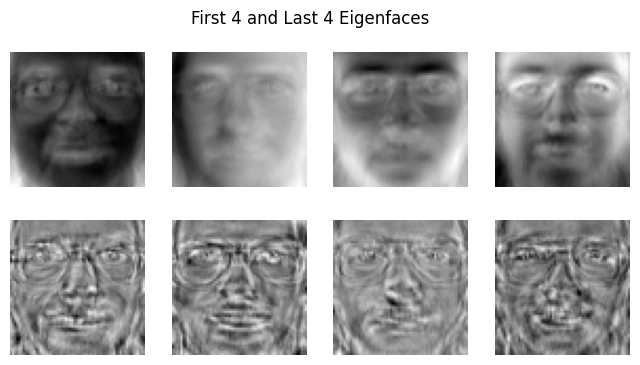

In [18]:
if k>=8:
    # plot first 4, last 4 eigenface
    fig, axes = plt.subplots(2, 4, figsize=(8, 4))
    for i in range(4):
        axes[0][i].imshow(projection_matrix[i,:].reshape(64, 64).astype(np.float64), cmap='gray')
        axes[1][i].imshow(projection_matrix[-i-1,:].reshape(64, 64).astype(np.float64), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].axis('off')
    plt.suptitle('First 4 and Last 4 Eigenfaces')
    plt.show()
else:
    # plot all eigenface
    fig, axes = plt.subplots(2, 4, figsize=(8, 4))
    for i in range(k):
        axes[i//4][i%4].imshow(projection_matrix[i,:].reshape(64, 64).astype(np.float64), cmap='gray')
        axes[i//4, i%4].axis('off')
    plt.suptitle(f'First {k} Eigenfaces')
    plt.show()

In [19]:
projection_matrix[0]

array([-0.00525377+0.j, -0.00878637+0.j, -0.0118311 +0.j, ...,
        0.00296326+0.j,  0.00545294+0.j,  0.00461928+0.j])

In [20]:
projection_matrix_load = np.loadtxt('projection_matrix_100.csv', delimiter=',')

In [21]:
projection_matrix_load[0]

array([-0.00525377, -0.00878637, -0.0118311 , ...,  0.00296326,
        0.00545294,  0.00461928])

In [19]:
# k = 5
# eigenface, projection_matrix = pca(train_data_centered, k)

In [20]:
# if k>=8:
#     # plot first 4, last 4 eigenface
#     fig, axes = plt.subplots(2, 4, figsize=(8, 4))
#     for i in range(4):
#         axes[0][i].imshow(projection_matrix[i,:].reshape(64, 64).astype(np.float64), cmap='gray')
#         axes[1][i].imshow(projection_matrix[-i-1,:].reshape(64, 64).astype(np.float64), cmap='gray')
#         axes[0, i].axis('off')
#         axes[1, i].axis('off')
#     plt.suptitle('First 4 and Last 4 Eigenfaces')
#     plt.show()
# else:
#     # plot all eigenface
#     fig, axes = plt.subplots(2, 4, figsize=(8, 4))
#     for i in range(k):
#         axes[i//4][i%4].imshow(projection_matrix[i,:].reshape(64, 64).astype(np.float64), cmap='gray')
#     for i in range(4):
#         axes[0, i].axis('off')
#         axes[1, i].axis('off')
#     plt.suptitle(f'First {k} Eigenfaces')
#     plt.show()

In [ ]:
# test!!!!!!!!!!!!!!!!!!!!!!!

In [22]:
def projection(X, projection_matrix):
    return np.dot(projection_matrix, X)

In [23]:
# load ground truth label of train and test data
train_label = np.loadtxt('train_target.csv', delimiter=',', dtype=np.int64)
test_label = np.loadtxt('test_target.csv', delimiter=',', dtype=np.int64)

In [24]:
train_label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23,
       23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25,
       25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27,
       27, 27, 27, 28, 28

In [25]:
test_label

array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
        8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16,
       17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25,
       25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33,
       34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39])

In [26]:
# load test data
test_data = np.loadtxt('test_data.csv', delimiter=',')

In [27]:
test_data.shape

(80, 4096)

In [28]:
# # load mean face data
# mean_face = np.loadtxt('mean_face.csv', delimiter=',')

In [29]:
# mean_face.shape

In [30]:
# centered_test_data = test_data.T - mean_face[:, None]

In [31]:
# centered_test_data.shape

In [32]:
# # load projection matrix
# projection_matrix = np.loadtxt('projection_matrix_400.csv', delimiter=',')

In [33]:
projection_matrix.shape

(100, 4096)

In [34]:
# projected_test_data = projection(centered_test_data, projection_matrix)

In [35]:
projected_test_data = projection(test_data.T - mean_face[:,None], projection_matrix)

In [36]:
projected_test_data.shape

(100, 80)

In [37]:
# # load projected train data
# projected_train_data = np.loadtxt('projected_data_400.csv', delimiter=',')

In [38]:
# projected_train_data.shape

In [39]:
projected_test_data.shape

(100, 80)

In [40]:
# calculate euclidean distance between two vectors
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

In [41]:
# # calculate prediction label of test data
# def predict_label(test_data, train_data, train_label):
#     # initialize prediction label
#     test_prediction_label = np.zeros(test_data.shape[1], dtype=np.int64)
#     for i in range(test_data.shape[1]):
#         # calculate euclidean distance between test data and train data
#         distance = np.array([euclidean_distance(test_data[:,i], train_data[:,j]) for j in range(train_data.shape[1])])
#         # sort distance in ascending order
#         distance_sorted_idx = np.argsort(distance)
#         # get minimum distance index
#         min_distance_idx = distance_sorted_idx[0]
#         # get label of minimum distance index
#         prediction_label = train_label[min_distance_idx]
#         # save prediction label
#         test_prediction_label[i] = prediction_label
#     return test_prediction_label


# calculate prediction label of test data
def predict_label(test_data, train_data, train_label):
    # initialize prediction label
    test_prediction_label = np.zeros(test_data.shape[1], dtype=np.int64)
    for i in range(test_data.shape[1]):
        # calculate euclidean distance between test data and train data
        distance = np.array([euclidean_distance(test_data[:,i], train_data[:,j]) for j in range(train_data.shape[1])])
        # print(distance)
        # find index of minimum distance
        min_distance_idx = np.argmin(distance)
        # get prediction label
        test_prediction_label[i] = train_label[min_distance_idx]
    return test_prediction_label

In [42]:
# predict_label(projected_test_data, projected_train_data, train_label)

In [43]:
predict_label(projected_test_data, projected_data, train_label)

array([ 0,  0,  1,  1, 12, 22,  3, 12,  4, 39,  5,  5,  6,  6,  0,  7,  8,
       39, 34,  7, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14,  0, 15, 16, 16,
       17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25,
       25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33,
       34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39])

In [44]:
test_label

array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
        8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16,
       17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25,
       25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33,
       34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39])

In [45]:
# calculate accuracy of prediction
def calculate_accuracy(prediction_label, ground_truth_label):
    return np.sum(prediction_label == ground_truth_label) / ground_truth_label.shape[0]

In [46]:
# calculate_accuracy(predict_label(projected_test_data, projected_train_data, train_label), test_label)

In [47]:
calculate_accuracy(predict_label(projected_test_data, projected_data, train_label), test_label)

0.8875

In [48]:
print(projection_matrix[0])

[-0.00525377+0.j -0.00878637+0.j -0.0118311 +0.j ...  0.00296326+0.j
  0.00545294+0.j  0.00461928+0.j]


In [49]:
print(projected_data[0])

[ -6.64027453+0.j  -1.5579742 +0.j  -5.50867186+0.j  -3.60524855+0.j
  -4.20371864+0.j  -4.8487047 +0.j  -6.30676106+0.j  -5.48729089+0.j
  -1.37717088+0.j  -1.22208798+0.j  -0.87684362+0.j   0.01984953+0.j
  -1.07013034+0.j  -0.53320441+0.j   0.68712368+0.j  -0.04576999+0.j
   2.44113516+0.j   2.30119475+0.j   2.00737325+0.j   2.42480937+0.j
   1.96456356+0.j  -0.44007273+0.j  -2.37374937+0.j  -1.50116264+0.j
  -0.37223464+0.j   0.28102457+0.j   0.30833309+0.j  -4.18107032+0.j
  -3.08183099+0.j  -3.63829509+0.j  -4.65954827+0.j  -0.59881555+0.j
  -0.69845287+0.j   0.85874485+0.j   1.79502048+0.j  -0.61858796+0.j
  -3.8990507 +0.j  -3.10258364+0.j  -1.37303957+0.j  -1.85026421+0.j
  -4.71214351+0.j  -4.61426112+0.j  -5.27473539+0.j  -9.80219964+0.j
 -10.01254382+0.j -11.01176283+0.j -10.28355293+0.j -10.47836819+0.j
  -5.3928152 +0.j  -2.4609896 +0.j  -5.60272494+0.j  -3.58603851+0.j
  -5.76493011+0.j  -5.66036431+0.j  -6.37540562+0.j  -6.78371373+0.j
  -4.73255409+0.j  -2.92683468+0.j

In [50]:
projected_test_data = projection(test_data.T - mean_face[:,None], projection_matrix_load)

In [51]:
predict_label(projected_test_data, projected_data, train_label)

array([ 4,  4, 14, 14, 20, 20, 20, 20, 14, 14, 14, 14, 14, 14, 20,  4, 14,
       14, 14,  4, 20, 14,  4, 14, 14, 14, 14, 14, 14, 14, 20, 14, 14, 14,
        4, 14, 20, 14,  4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 20, 14, 20, 14, 14, 14, 14])

In [52]:
print(projection_matrix.dtype)

complex128


In [54]:
print(projected_data[0])

[ -6.64027453+0.j  -1.5579742 +0.j  -5.50867186+0.j  -3.60524855+0.j
  -4.20371864+0.j  -4.8487047 +0.j  -6.30676106+0.j  -5.48729089+0.j
  -1.37717088+0.j  -1.22208798+0.j  -0.87684362+0.j   0.01984953+0.j
  -1.07013034+0.j  -0.53320441+0.j   0.68712368+0.j  -0.04576999+0.j
   2.44113516+0.j   2.30119475+0.j   2.00737325+0.j   2.42480937+0.j
   1.96456356+0.j  -0.44007273+0.j  -2.37374937+0.j  -1.50116264+0.j
  -0.37223464+0.j   0.28102457+0.j   0.30833309+0.j  -4.18107032+0.j
  -3.08183099+0.j  -3.63829509+0.j  -4.65954827+0.j  -0.59881555+0.j
  -0.69845287+0.j   0.85874485+0.j   1.79502048+0.j  -0.61858796+0.j
  -3.8990507 +0.j  -3.10258364+0.j  -1.37303957+0.j  -1.85026421+0.j
  -4.71214351+0.j  -4.61426112+0.j  -5.27473539+0.j  -9.80219964+0.j
 -10.01254382+0.j -11.01176283+0.j -10.28355293+0.j -10.47836819+0.j
  -5.3928152 +0.j  -2.4609896 +0.j  -5.60272494+0.j  -3.58603851+0.j
  -5.76493011+0.j  -5.66036431+0.j  -6.37540562+0.j  -6.78371373+0.j
  -4.73255409+0.j  -2.92683468+0.j

k = 4
==================== TRAINING PHASE ====================


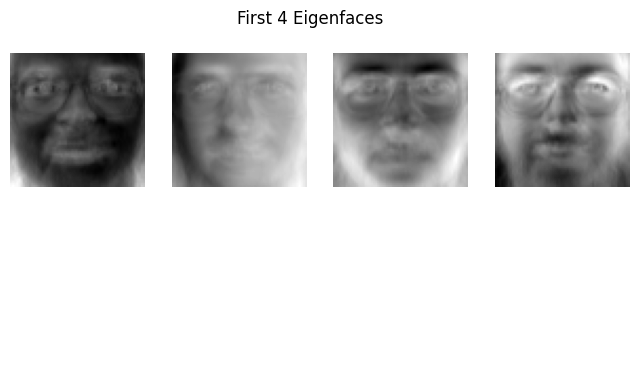

==================== TESTING PHASE ====================
0.65
k = 10
==================== TRAINING PHASE ====================


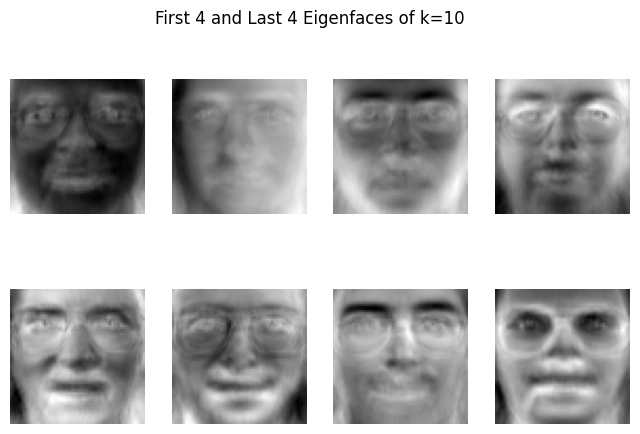

==================== TESTING PHASE ====================
0.8125
k = 20
==================== TRAINING PHASE ====================


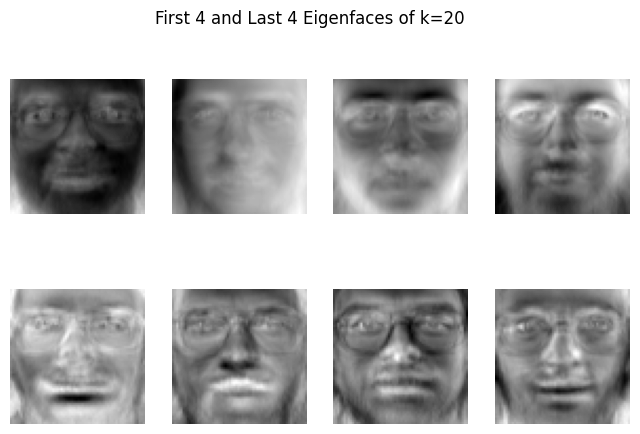

==================== TESTING PHASE ====================
0.875
k = 40
==================== TRAINING PHASE ====================


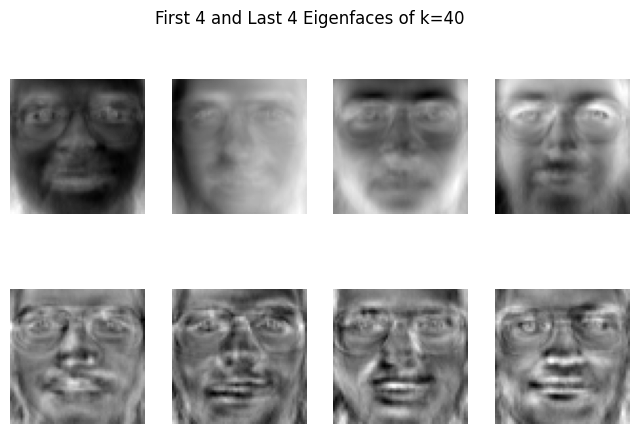

==================== TESTING PHASE ====================
0.8625
k = 100
==================== TRAINING PHASE ====================


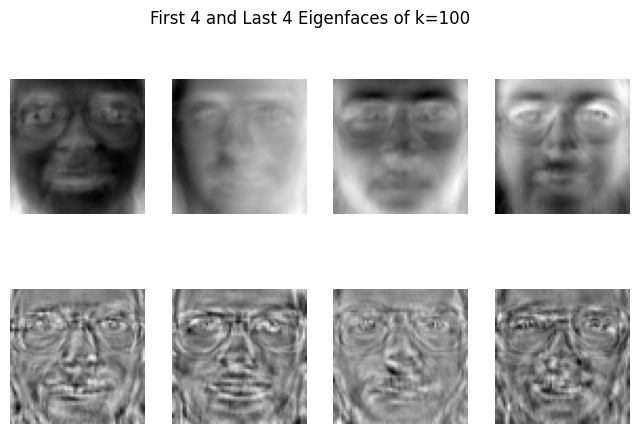

==================== TESTING PHASE ====================
0.8875
k = 200
==================== TRAINING PHASE ====================


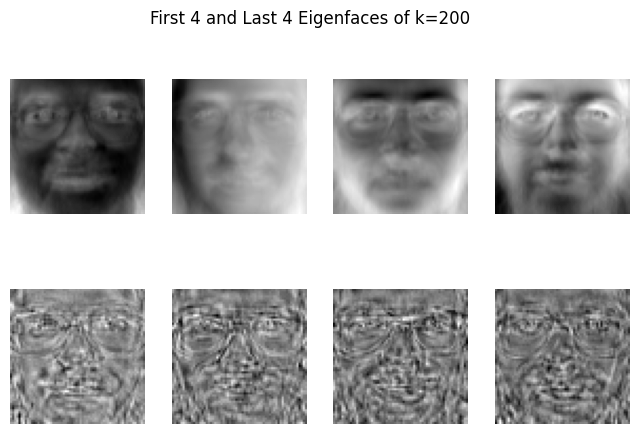

==================== TESTING PHASE ====================
0.8875
k = 400
==================== TRAINING PHASE ====================


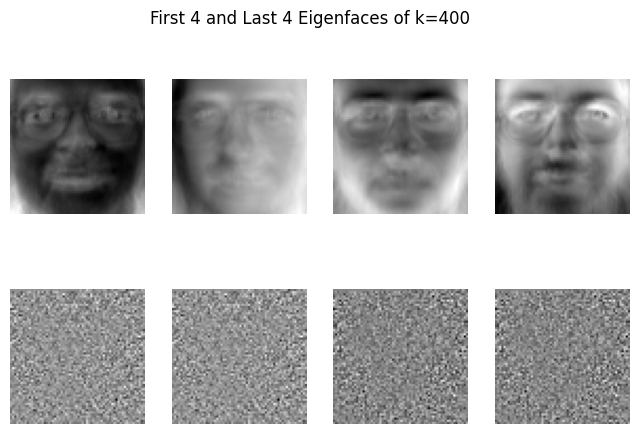

==================== TESTING PHASE ====================
0.8875
k = 800
==================== TRAINING PHASE ====================


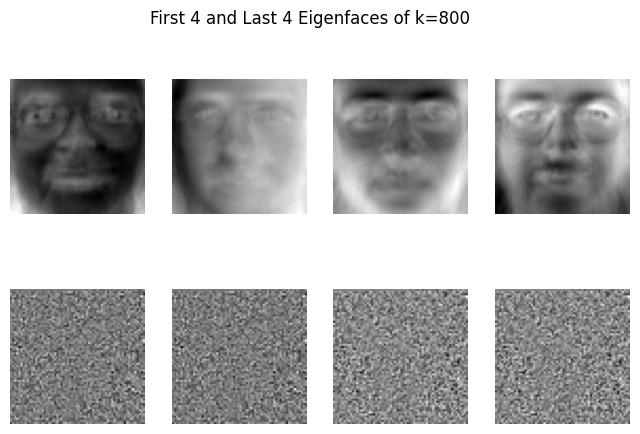

==================== TESTING PHASE ====================
0.8875
k = 1200
==================== TRAINING PHASE ====================


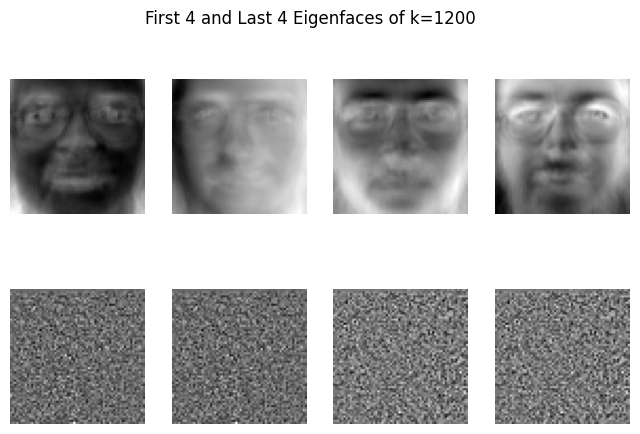

==================== TESTING PHASE ====================
0.8875
k = 1600
==================== TRAINING PHASE ====================


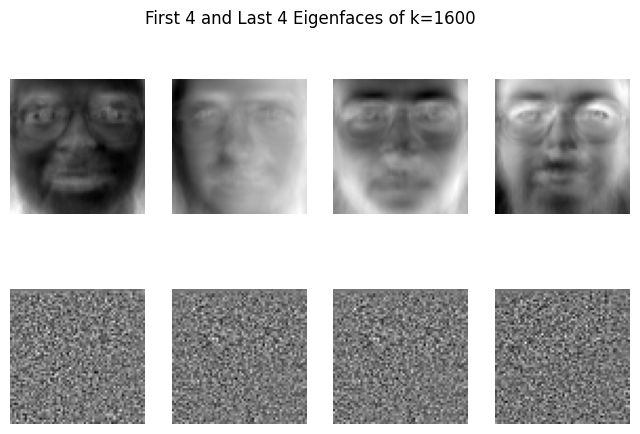

==================== TESTING PHASE ====================
0.8875
k = 2000
==================== TRAINING PHASE ====================


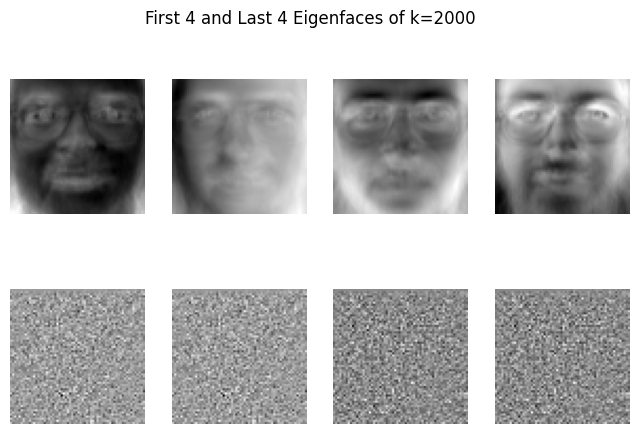

==================== TESTING PHASE ====================
0.8875


In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



# get input parameter k from command line, default 100
k = 100

for k_for in [4, 10, 20, 40, 100, 200, 400, 800, 1200, 1600, 2000]:

    k = k_for

    # if len(sys.argv) > 1:
        # k = int(sys.argv[1])
    print(f'k = {k}')

    # get train data from command line
    train_data_path = 'train_data.csv'
    # if len(sys.argv) > 2:
        # train_data_path = sys.argv[1]

    # get test data from command line
    test_data_path = 'test_data.csv'
    # if len(sys.argv) > 3:
    #     test_data_path = sys.argv[3]

    # get train target from command line
    train_target_path = 'train_target.csv'
    # if len(sys.argv) > 4:
    #     train_target_path = sys.argv[4]

    # get test target from command line
    test_target_path = 'test_target.csv'
    # if len(sys.argv) > 5:
    #     test_target_path = sys.argv[5]



    print('==================== TRAINING PHASE ====================')


    # calculate covariance matrix of input matrix X with shape (D, N) that has D dimension and N samples
    def calculate_covariance_matrix(X):
        # calculate mean of data
        mean = np.mean(X, axis=1)
        # calculate centered data matrix
        X_centered = X - mean[:, None]
        # compute covariance matrix with centered data matrix
        N = X.shape[1]
        covariance_matrix = np.dot(X_centered, X_centered.T) / N
        return covariance_matrix

    # calculate eigenvector and eigenvalue of given matrix
    def calculate_eigenvalue_eigenvector(X):
        eig_val, eig_vec = np.linalg.eig(X)
        return eig_val, eig_vec

    # compute principal component analysis of given matrix X with 
    # shape (D, N) with D dimension and N samples to k principal components
    def pca(X, k):
        # calculate covariance matrix of X
        # print('calculating covariance matrix')
        covariance_matrix = calculate_covariance_matrix(X)
        # calculate eigenvalue and eigenvector of covariance matrix
        # print('calculating eigenvalue and eigenvector')
        eigenvalue, eigenvector = calculate_eigenvalue_eigenvector(covariance_matrix)
        # sort eigenvalue and eigenvector in descending order
        # print('sorting eigenvalue and eigenvector')
        eigenvalue_sorted_idx = np.argsort(eigenvalue)[::-1]
        # eigenvalue_sorted = eigenvalue[eigenvalue_sorted_idx]
        eigenvector_sorted = eigenvector[:, eigenvalue_sorted_idx]
        # calculate projection matrix
        projection_matrix = eigenvector_sorted[:, :k].T
        # calculate projected data matrix
        # print('calculating projection')
        mean = np.mean(X, axis=1)
        projected_data = np.dot(projection_matrix, X-mean[:, None])
        # return projected data matrix and projection matrix
        return projected_data, projection_matrix


    # load training data
    # print('loading training data')
    train_data = np.loadtxt(train_data_path, delimiter=',')


    # compute eigenface of train data with projection dimension k
    projected_data, projection_matrix = pca(train_data.T, k)


    # save projected data and projection matrix to csv file
    # np.savetxt(f'projected_data_{k}.csv', projected_data, delimiter=',')
    # np.savetxt(f'projection_matrix_{k}.csv', projection_matrix, delimiter=',')
    # print('saved projected_data.csv and projection_matrix.csv')

    if k>=8:
        # plot first 4, last 4 eigenface
        fig, axes = plt.subplots(2, 4, figsize=(8, 5))
        for i in range(4):
            axes[0][i].imshow(projection_matrix[i,:].reshape(64, 64).astype(np.float64), cmap='gray')
            axes[1][i].imshow(projection_matrix[-i-1,:].reshape(64, 64).astype(np.float64), cmap='gray')
            axes[0, i].axis('off')
            axes[1, i].axis('off')
        plt.suptitle(f'First 4 and Last 4 Eigenfaces of k={k}')
        plt.show()
    else:
        # plot all eigenface
        fig, axes = plt.subplots(2, 4, figsize=(8, 4))
        for i in range(k):
            axes[i//4][i%4].imshow(projection_matrix[i,:].reshape(64, 64).astype(np.float64), cmap='gray')
        for i in range(4):
            axes[0, i].axis('off')
            axes[1, i].axis('off')
        plt.suptitle(f'First {k} Eigenfaces')
        plt.show()



    print('==================== TESTING PHASE ====================')


    # calculate projection of data X with projection matrix
    def projection(X, projection_matrix):
        return np.dot(projection_matrix, X)

    # calculate euclidean distance between two vectors
    def euclidean_distance(x, y):
        return np.linalg.norm(x - y)

    # calculate prediction label of test data
    def predict_label(test_data, train_data, train_label):
        # initialize prediction label
        test_prediction_label = np.zeros(test_data.shape[1], dtype=np.int64)
        for i in range(test_data.shape[1]):
            # calculate euclidean distances between test data and train data
            distance = np.array([euclidean_distance(test_data[:,i], train_data[:,j]) for j in range(train_data.shape[1])])
            # get prediction label by finding the index of minimum distance
            test_prediction_label[i] = train_label[np.argmin(distance)]
        return test_prediction_label

    # calculate accuracy of prediction
    def calculate_accuracy(prediction_label, ground_truth_label):
        return np.sum(prediction_label == ground_truth_label) / ground_truth_label.shape[0]


    # load test data
    # print('loading test data')
    test_data = np.loadtxt(test_data_path, delimiter=',')

    # load ground truth label of train and test data
    # print('loading train and test label')
    train_label = np.loadtxt(train_target_path, delimiter=',', dtype=np.int64)
    test_label = np.loadtxt(test_target_path, delimiter=',', dtype=np.int64)


    # calculate mean face
    mean_face = np.mean(train_data, axis=0)

    # subtract mean face from test data
    test_data_centered = test_data.T - mean_face[:, None]

    # project test data to k eigenface subspace
    projected_test_data = projection(test_data_centered, projection_matrix)

    # predict label of test data
    prediction_label = predict_label(projected_test_data, projected_data, train_label)

    # calculate accuracy of prediction
    accuracy = calculate_accuracy(prediction_label, test_label)
    print(accuracy)


    # save prediction label to csv file
    # np.savetxt('prediction_label.csv', prediction_label, delimiter=',', fmt='%d')

In [2]:
import matplotlib.pyplot as plt

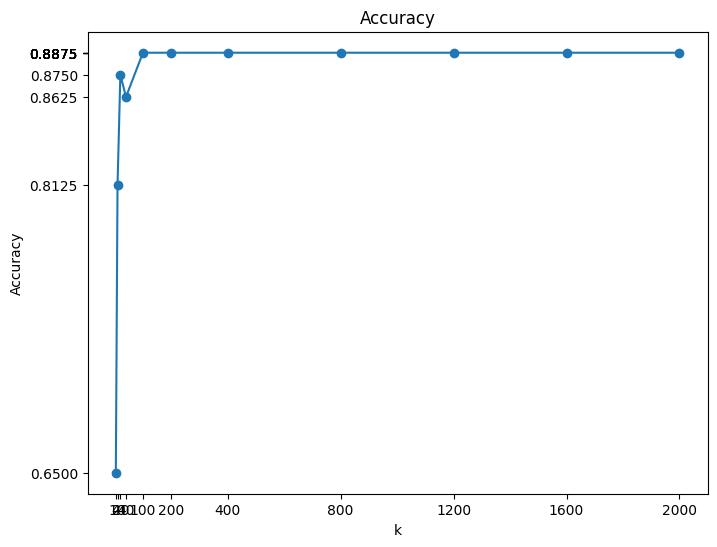

In [18]:
# plot accuracy and k
plt.figure(figsize=(8,6))
s = [4, 10, 20, 40, 100, 200, 400, 800, 1200, 1600, 2000]
acc = [0.65, 0.8125, 0.875, 0.8625, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875]
plt.plot(s, acc, 'o-')
# set x axis logscale
# plt.xscale('log')
# set xtick and ytick
plt.xticks(s)
plt.yticks(acc)
# set overlapped x tick visible by moving ticks 
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
# set x and y label
plt.xlabel('k')
plt.ylabel('Accuracy')
# set title
plt.title('Accuracy')
plt.show()

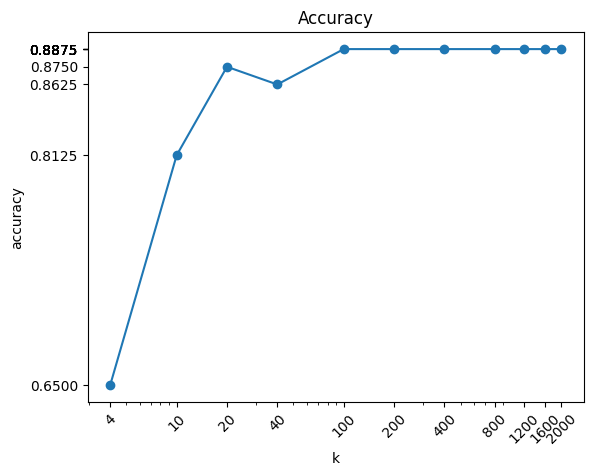

In [23]:
import matplotlib
# plot accuracy and k
# plt.figure(figsize=(12, 8))
s = [4, 10, 20, 40, 100, 200, 400, 800, 1200, 1600, 2000]
acc = [0.65, 0.8125, 0.875, 0.8625, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875]
# plt.plot(s, acc, marker='o')



fig1, ax1 = plt.subplots()
ax1.plot(s, acc, 'o-')
ax1.set_xscale('log')
ax1.set_xticks(s)
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_xaxis().get_major_formatter().labelOnlyBase = False

# rotate xtick label
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)



ax1.set_yticks(acc)
# set x and y label
ax1.set_xlabel('k')
ax1.set_ylabel('accuracy')
# set title
ax1.set_title('Accuracy')
plt.show()